In [15]:
import pandas as pd
import numpy as np
import seaborn as sns

In [16]:
raw_welfare = pd.read_spss('../Koweps_hpwc14_2019_beta2.sav')
welfare = raw_welfare.copy()

In [17]:
welfare = welfare.rename(
    columns={'h14_g3': 'sex',
             'h14_g4': 'birth',
             'h14_g10': 'marriage_type',
             'h14_g11': 'religion',
             'p1402_8aq1': 'income',
             'h14_eco9': 'code_job',
             'h14_reg7': 'code_region'
             }
)

In [18]:
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

In [19]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)

In [20]:
welfare = welfare.assign(ageg=np.where(welfare['age'] < 30, 'young',
                    np.where(welfare['age'] <= 59, 'middle',
                    'old')))

In [21]:
sex_income = welfare.dropna(subset=['income']) \
    .groupby(['ageg', 'sex'], as_index=False) \
    .agg(mean_income=('income', 'mean'))


In [22]:
sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

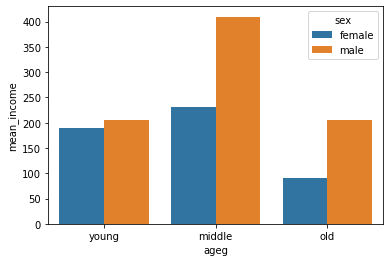

In [23]:
sns.barplot(data = sex_income, x = 'ageg', y = 'mean_income', hue='sex',order=['young', 'middle', 'old'])

In [24]:
sex_age = welfare.dropna(subset=['income']) \
    .groupby(['age', 'sex'], as_index=False) \
    .agg(mean_income=('income', 'mean'))


In [25]:
sex_age

,age,sex,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
...,...,...,...
140,89.0,male,27.000000
141,90.0,female,27.000000
142,91.0,female,27.000000
143,91.0,male,13.000000


<AxesSubplot:xlabel='age', ylabel='mean_income'>

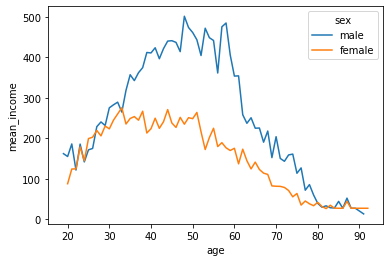

In [26]:
sns.lineplot(data = sex_age, x = 'age', y = 'mean_income', hue='sex')